In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('../data/weblogs.csv')
df.head()

df = df.drop(['NIGHT', 'ID', 'OTHER_METHOD'], axis=1)

X = df.loc[:, df.columns != 'ROBOT']
y = df['ROBOT']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

numeric_cols = X.select_dtypes(['int64', 'float64']).columns

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

param_grid = {
    'max_depth': np.arange(9, 100),
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 4],
}

gscv = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gscv.fit(X_train, y_train)

print(f"Best parameters: {gscv.best_params_}\n")
print(f"Best score: {gscv.best_score_}\n")

best_clf = gscv.best_estimator_
y_pred = best_clf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")
print(f"Classification report:\n{classification_report(y_test, y_pred)}\n")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}\n")

Best parameters: {'max_depth': 14, 'min_samples_leaf': 2, 'min_samples_split': 3}

Best score: 0.9754087625362352

Accuracy: 0.9738697943730977

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     10785
           1       0.93      0.94      0.93      2686

    accuracy                           0.97     13471
   macro avg       0.96      0.96      0.96     13471
weighted avg       0.97      0.97      0.97     13471


Confusion matrix:
[[10593   192]
 [  160  2526]]



In [43]:
test_dtc_1 = DecisionTreeClassifier(max_depth=14, min_samples_leaf=2, min_samples_split=3, random_state=42)
test_dtc_1.fit(X_train, y_train)
y_pred = test_dtc_1.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")

Accuracy: 0.9740182614505234



Confusion matrix:
[[10602   183]
 [  237  2449]]



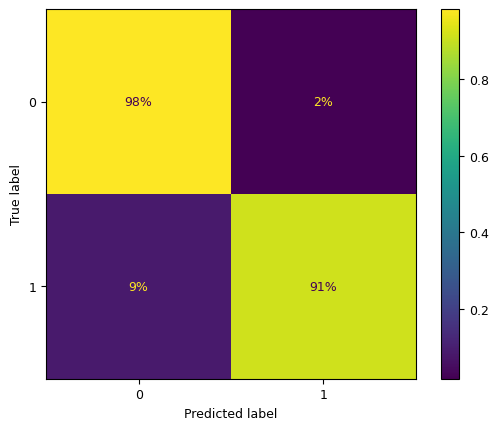

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(test_dtc_1, X_test, y_test, cv=5)

print(f"Confusion matrix:\n{confusion_matrix(y_test, y_test_pred)}\n")

plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, normalize="true", values_format='.0%')
plt.show()

In [50]:
import pickle
filename = '../modellen/decision_tree_classifier_final_min-sample-split_3_max-depth_14.sav'
pickle.dump(test_dtc_1, open(filename, 'wb'))